Centralized Baseline

In order to quantify the performance of federated models, we will train a normal model on the CIPHER-100 so to have a banchmark for the ideal situation our models should reach.

Model Set Up

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import Compose, Normalize, ToTensor, Resize, CenterCrop
import matplotlib.pyplot as plt
from tqdm import tqdm
from typing import Optional, cast

class CustomDino(nn.Module):
    def __init__(self, num_classes: int = 100, backbone: Optional[nn.Module] = None):
        super().__init__()
        if backbone is None:
            # Load DINO without pretrained weights for this baseline or with them if desired
            # Note: For a true baseline comparison, ensure consistency with your federated setup.
            # Here we use pretrained=True as typical for Task Arithmetic baselines.
            backbone = cast(nn.Module, torch.hub.load(
                "facebookresearch/dino:main", "dino_vits16", pretrained=True
            ))
        self.backbone: nn.Module = backbone
        # Freeze backbone if you only want to train the head (Linear Probing)
        # or keep it unfrozen for Full Fine-Tuning (recommended for strong baselines)
        # For this baseline, we usually fine-tune the whole model or just the head depending on your specific protocol.
        # Assuming full fine-tuning for a strong baseline:
        for param in self.backbone.parameters():
            param.requires_grad = True

        self.classifier = nn.Linear(384, num_classes)  # 384 = output CLS token DINO ViT-S/16

    def forward(self, x: torch.Tensor):
        features = self.backbone(x)        # [batch, 384]
        logits = self.classifier(features) # [batch, num_classes]
        return logits

Train

Initializing model on cuda...


Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


Starting training...


Epoch 1/20: 100%|██████████| 782/782 [08:00<00:00,  1.63it/s, loss=4.61]


Epoch 1 Results: Train Loss: 6.6397 | Test Loss: 4.8446 | Test Acc: 0.96%


Epoch 2/20: 100%|██████████| 782/782 [07:59<00:00,  1.63it/s, loss=4.62]


Epoch 2 Results: Train Loss: 4.6624 | Test Loss: 4.5801 | Test Acc: 2.24%


Epoch 3/20: 100%|██████████| 782/782 [08:01<00:00,  1.62it/s, loss=4.48]


Epoch 3 Results: Train Loss: 4.4725 | Test Loss: 4.3807 | Test Acc: 3.33%


Epoch 4/20: 100%|██████████| 782/782 [08:01<00:00,  1.62it/s, loss=4.21]


Epoch 4 Results: Train Loss: 4.3139 | Test Loss: 4.2638 | Test Acc: 4.90%


Epoch 5/20: 100%|██████████| 782/782 [08:02<00:00,  1.62it/s, loss=4.36]


Epoch 5 Results: Train Loss: 4.2170 | Test Loss: 4.1387 | Test Acc: 5.83%


Epoch 6/20: 100%|██████████| 782/782 [08:02<00:00,  1.62it/s, loss=4]


Epoch 6 Results: Train Loss: 4.0913 | Test Loss: 4.0906 | Test Acc: 7.52%


Epoch 7/20: 100%|██████████| 782/782 [08:03<00:00,  1.62it/s, loss=3.88]


Epoch 7 Results: Train Loss: 3.9573 | Test Loss: 3.8556 | Test Acc: 10.78%


Epoch 8/20: 100%|██████████| 782/782 [08:03<00:00,  1.62it/s, loss=3.65]


Epoch 8 Results: Train Loss: 3.7962 | Test Loss: 3.7458 | Test Acc: 12.22%


Epoch 9/20: 100%|██████████| 782/782 [08:04<00:00,  1.62it/s, loss=3.7]


Epoch 9 Results: Train Loss: 3.6443 | Test Loss: 3.5857 | Test Acc: 14.85%


Epoch 10/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.61]


Epoch 10 Results: Train Loss: 3.5173 | Test Loss: 3.5023 | Test Acc: 16.64%


Epoch 11/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.98]


Epoch 11 Results: Train Loss: 3.3981 | Test Loss: 3.3947 | Test Acc: 18.29%


Epoch 12/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.92]


Epoch 12 Results: Train Loss: 3.2741 | Test Loss: 3.2658 | Test Acc: 20.90%


Epoch 13/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.81]


Epoch 13 Results: Train Loss: 3.1644 | Test Loss: 3.1870 | Test Acc: 22.48%


Epoch 14/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.81]


Epoch 14 Results: Train Loss: 3.0633 | Test Loss: 3.0837 | Test Acc: 24.61%


Epoch 15/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=3.25]


Epoch 15 Results: Train Loss: 2.9667 | Test Loss: 3.0781 | Test Acc: 24.51%


Epoch 16/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=4.33]


Epoch 16 Results: Train Loss: 2.8856 | Test Loss: 2.9748 | Test Acc: 26.63%


Epoch 17/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.69]


Epoch 17 Results: Train Loss: 2.8123 | Test Loss: 2.9320 | Test Acc: 27.83%


Epoch 18/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=2.55]


Epoch 18 Results: Train Loss: 2.7520 | Test Loss: 2.8893 | Test Acc: 28.21%


Epoch 19/20: 100%|██████████| 782/782 [08:04<00:00,  1.61it/s, loss=3.25]


Epoch 19 Results: Train Loss: 2.7074 | Test Loss: 2.8719 | Test Acc: 28.66%


Epoch 20/20: 100%|██████████| 782/782 [08:05<00:00,  1.61it/s, loss=2.05]


Epoch 20 Results: Train Loss: 2.6792 | Test Loss: 2.8604 | Test Acc: 28.84%


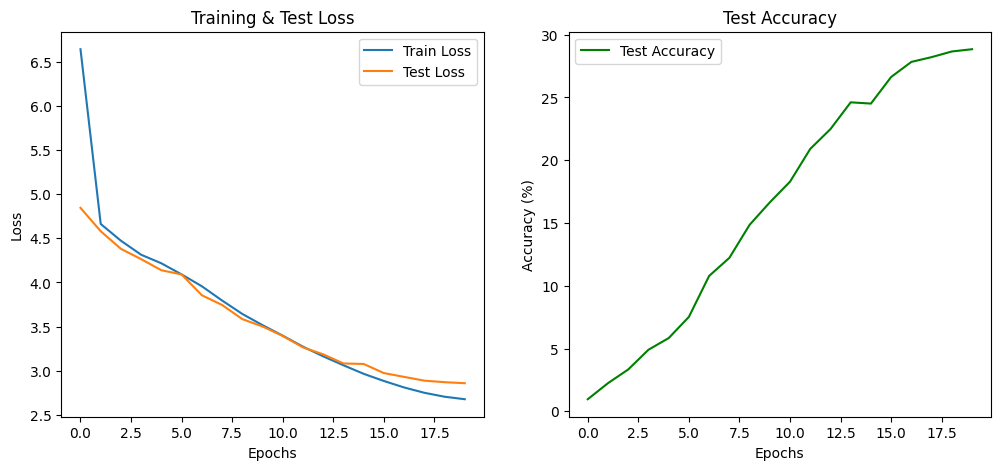

In [ ]:
# ==========================================
#  Training Setup & Execution
# ==========================================

# --- Hyperparameters ---
BATCH_SIZE = 64
LR  = 0.01           # Learning Rate (Tune this: 0.1, 0.01, 0.001)
MOMENTUM = 0.9
WEIGHT_DECAY = 5e-4
EPOCHS = 20         # Increase to 100+ for final results
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_cifar100_loaders():
    print("Downloading and preparing data...")
    # Standard CIFAR-100 Normalization
    stats = ((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))

    # Transforms
    transform_train = Compose([
        Resize(256), CenterCrop(224), # Required for DINO
        # transforms.RandomHorizontalFlip(), # Optional augmentation
        ToTensor(),
        Normalize(*stats),
    ])

    transform_test = Compose([
        Resize(256), CenterCrop(224),
        ToTensor(),
        Normalize(*stats),
    ])

    trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
    testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)

    trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    return trainloader, testloader

def train_centralized():
    # 1. Setup Data
    trainloader, testloader = get_cifar100_loaders()

    # 2. Setup Model
    print(f"Initializing model on {DEVICE}...")
    # Using CustomDino as it is the primary model for Task Arithmetic
    model = CustomDino(num_classes=100).to(DEVICE)

    # 3. Optimizer & Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

    # 4. Training Loop
    train_losses = []
    test_losses = []
    test_accs = []

    print("Starting training...")
    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0

        # Progress bar for training
        pbar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{EPOCHS}")
        for images, labels in pbar:
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix({'loss': loss.item()})

        scheduler.step()

        avg_train_loss = running_loss / len(trainloader)
        train_losses.append(avg_train_loss)

        # 5. Evaluation
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        avg_test_loss = test_loss / len(testloader)
        acc = 100. * correct / total

        test_losses.append(avg_test_loss)
        test_accs.append(acc)

        print(f"Epoch {epoch+1} Results: Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f} | Test Acc: {acc:.2f}%")

    # 6. Plotting Results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Test Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(test_accs, label='Test Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy')
    plt.legend()

    plt.show()

# Run the function
if __name__ == "__main__":
    train_centralized()